<a href="https://colab.research.google.com/github/IYashCanCode/IntroductionToAdvanceRegression/blob/main/Project_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ds = pd.read_csv('testset.csv')

In [ ]:
ds.head()

datetime_utc  _conds   _dewptm   _fog   _hail   _heatindexm   _hum  \
0  19961101-11:00   Smoke       9.0      0       0           NaN   27.0   
1  19961101-12:00   Smoke      10.0      0       0           NaN   32.0   
2  19961101-13:00   Smoke      11.0      0       0           NaN   44.0   
3  19961101-14:00   Smoke      10.0      0       0           NaN   41.0   
4  19961101-16:00   Smoke      11.0      0       0           NaN   47.0   

    _precipm   _pressurem   _rain   _snow   _tempm   _thunder   _tornado  \
0        NaN       1010.0       0       0     30.0          0          0   
1        NaN      -9999.0       0       0     28.0          0          0   
2        NaN      -9999.0       0       0     24.0          0          0   
3        NaN       1010.0       0       0     24.0          0          0   
4        NaN       1011.0       0       0     23.0          0          0   

    _vism   _wdird  _wdire   _wgustm   _windchillm   _wspdm  
0     5.0    280.0    West       NaN           NaN      7.4  
1     NaN      0.0   North       NaN           NaN      NaN  
2     NaN      0.0   North       NaN           NaN      NaN  
3     2.0      0.0   North       NaN           NaN      NaN  
4     1.2      0.0   North       NaN           NaN      0.0

**Converting the column names to understandable names**

In [ ]:
ds.rename(columns={'datetime_utc':'Date Time',' _conds':'Conditions',' _dewptm':'dewptm',' _fog':'Fog',' _hail':'Hail',' _hum':'Humidity',' _pressurem':'Pressure',' _rain':'Rain', ' _snow':'Snow', ' _tempm':'Tempreature', ' _thunder':'Thunder', ' _tornado':'Tornado',' _vism':'vism', ' _wdird':'wdird', ' _wdire':'wdire', ' _wspdm':'wspdm'},inplace=True)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date Time     100990 non-null  object 
 1   Conditions    100918 non-null  object 
 2   dewptm        100369 non-null  float64
 3   Fog           100990 non-null  int64  
 4   Hail          100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6   Humidity      100233 non-null  float64
 7    _precipm     0 non-null       float64
 8   Pressure      100758 non-null  float64
 9   Rain          100990 non-null  int64  
 10  Snow          100990 non-null  int64  
 11  Tempreature   100317 non-null  float64
 12  Thunder       100990 non-null  int64  
 13  Tornado       100990 non-null  int64  
 14  vism          96562 non-null   float64
 15  wdird         86235 non-null   float64
 16  wdire         86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [ ]:
ds.isnull().sum()

Date Time            0
Conditions          72
dewptm             621
Fog                  0
Hail                 0
 _heatindexm     71835
Humidity           757
 _precipm       100990
Pressure           232
Rain                 0
Snow                 0
Tempreature        673
Thunder              0
Tornado              0
vism              4428
wdird            14755
wdire            14755
 _wgustm         99918
 _windchillm    100411
wspdm             2358
dtype: int64

**Calculating the average of missing values**

In [ ]:
ds.isnull().mean()

Date Time       0.000000
Conditions      0.000713
dewptm          0.006149
Fog             0.000000
Hail            0.000000
 _heatindexm    0.711308
Humidity        0.007496
 _precipm       1.000000
Pressure        0.002297
Rain            0.000000
Snow            0.000000
Tempreature     0.006664
Thunder         0.000000
Tornado         0.000000
vism            0.043846
wdird           0.146104
wdire           0.146104
 _wgustm        0.989385
 _windchillm    0.994267
wspdm           0.023349
dtype: float64

**From the above information we get to know abouth the percentage of null values in each column in the dataset. Based on the percentage we will exclude the columns which have percentage greater than 70% i.e., 0.7**

In [ ]:
ds[ds.columns[ds.isnull().mean()>0.7]]

_heatindexm   _precipm   _wgustm   _windchillm
0                NaN        NaN       NaN           NaN
1                NaN        NaN       NaN           NaN
2                NaN        NaN       NaN           NaN
3                NaN        NaN       NaN           NaN
4                NaN        NaN       NaN           NaN
...              ...        ...       ...           ...
100985           NaN        NaN       NaN           NaN
100986           NaN        NaN       NaN           NaN
100987           NaN        NaN       NaN           NaN
100988           NaN        NaN       NaN           NaN
100989           NaN        NaN       NaN           NaN

[100990 rows x 4 columns]

**When we compile the above statement it gives the columns which have NULL mean value greater than 70%. The columns which falls in this constraint are '_heatindexm','_precipm','_wgustm'	and '_windchillm'.Now in the next line of code we will assign the columns which have NULLmean value less than 70% .**

In [ ]:
ds = ds[ds.columns[ds.isnull().mean()<0.7]]

In [ ]:
ds.head()

Date Time Conditions  dewptm  Fog  Hail  Humidity  Pressure  Rain  \
0  19961101-11:00      Smoke     9.0    0     0      27.0    1010.0     0   
1  19961101-12:00      Smoke    10.0    0     0      32.0   -9999.0     0   
2  19961101-13:00      Smoke    11.0    0     0      44.0   -9999.0     0   
3  19961101-14:00      Smoke    10.0    0     0      41.0    1010.0     0   
4  19961101-16:00      Smoke    11.0    0     0      47.0    1011.0     0   

   Snow  Tempreature  Thunder  Tornado  vism  wdird  wdire  wspdm  
0     0         30.0        0        0   5.0  280.0   West    7.4  
1     0         28.0        0        0   NaN    0.0  North    NaN  
2     0         24.0        0        0   NaN    0.0  North    NaN  
3     0         24.0        0        0   2.0    0.0  North    NaN  
4     0         23.0        0        0   1.2    0.0  North    0.0

**In the next line of code we tried to extract the basic statistics in the data using a predefined function in python known as describe(). With the aid of this function we get the count of NOT NULL values count of each column, MEAN of each column, STANDARD DEVIATION of each column, MINIMUM and MAXIMUM value and the QUARTILE range of the data.**

**NOTE: descibe() works only on numerical data.**

In [ ]:
ds.describe()

dewptm            Fog           Hail       Humidity  \
count  100369.000000  100990.000000  100990.000000  100233.000000   
mean       15.741205       0.069690       0.000129      57.909481   
std         7.058587       0.254625       0.011345      23.807771   
min       -24.000000       0.000000       0.000000       4.000000   
25%        10.000000       0.000000       0.000000      39.000000   
50%        15.000000       0.000000       0.000000      59.000000   
75%        22.000000       0.000000       0.000000      78.000000   
max        75.000000       1.000000       1.000000     243.000000   

           Pressure           Rain           Snow    Tempreature  \
count  1.007580e+05  100990.000000  100990.000000  100317.000000   
mean   1.932331e+03       0.026260       0.000010      25.451269   
std    3.183786e+05       0.159908       0.003147       8.482859   
min   -9.999000e+03       0.000000       0.000000       1.000000   
25%    1.002000e+03       0.000000       0.000000      19.000000   
50%    1.008000e+03       0.000000       0.000000      27.000000   
75%    1.014000e+03       0.000000       0.000000      32.000000   
max    1.010614e+08       1.000000       1.000000      90.000000   

             Thunder       Tornado          vism         wdird         wspdm  
count  100990.000000  100990.00000  96562.000000  86235.000000  98632.000000  
mean        0.009427       0.00002      2.402774    163.549974      7.678463  
std         0.096633       0.00445     20.746028    120.002076     11.932157  
min         0.000000       0.00000      0.000000      0.000000      0.000000  
25%         0.000000       0.00000      1.500000     50.000000      0.000000  
50%         0.000000       0.00000      2.000000    160.000000      7.400000  
75%         0.000000       0.00000      3.000000    270.000000     11.100000  
max         1.000000       1.00000   6436.000000    960.000000   1514.900000

**DEALING WITH NULL VALUES**

In [ ]:
ds.isnull().sum()

Date Time          0
Conditions        72
dewptm           621
Fog                0
Hail               0
Humidity         757
Pressure         232
Rain               0
Snow               0
Tempreature      673
Thunder            0
Tornado            0
vism            4428
wdird          14755
wdire          14755
wspdm           2358
dtype: int64

**Trying the most basic method to counter the NULL values that is using fillna() with 'ffill' i.e., in forward fill way which means that NULL value gets replaced by the previous value before NULL**

In [ ]:
ds.fillna(method='ffill',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
ds.isnull().sum()

Date Time      0
Conditions     0
dewptm         0
Fog            0
Hail           0
Humidity       0
Pressure       0
Rain           0
Snow           0
Tempreature    0
Thunder        0
Tornado        0
vism           0
wdird          0
wdire          0
wspdm          0
dtype: int64

In [ ]:
ds

Date Time Conditions  dewptm  Fog  Hail  Humidity  Pressure  \
0       19961101-11:00      Smoke     9.0    0     0      27.0    1010.0   
1       19961101-12:00      Smoke    10.0    0     0      32.0   -9999.0   
2       19961101-13:00      Smoke    11.0    0     0      44.0   -9999.0   
3       19961101-14:00      Smoke    10.0    0     0      41.0    1010.0   
4       19961101-16:00      Smoke    11.0    0     0      47.0    1011.0   
...                ...        ...     ...  ...   ...       ...       ...   
100985  20170424-06:00       Haze    17.0    0     0      25.0    1005.0   
100986  20170424-09:00       Haze    14.0    0     0      16.0    1003.0   
100987  20170424-12:00       Haze    12.0    0     0      14.0    1002.0   
100988  20170424-15:00       Haze    15.0    0     0      27.0    1004.0   
100989  20170424-18:00       Haze    15.0    0     0      30.0    1005.0   

        Rain  Snow  Tempreature  Thunder  Tornado  vism  wdird  wdire  wspdm  
0          0     0         30.0        0        0   5.0  280.0   West    7.4  
1          0     0         28.0        0        0   5.0    0.0  North    7.4  
2          0     0         24.0        0        0   5.0    0.0  North    7.4  
3          0     0         24.0        0        0   2.0    0.0  North    7.4  
4          0     0         23.0        0        0   1.2    0.0  North    0.0  
...      ...   ...          ...      ...      ...   ...    ...    ...    ...  
100985     0     0         34.0        0        0   4.0  320.0     NW   11.1  
100986     0     0         38.0        0        0   4.0  320.0     NW   22.2  
100987     0     0         36.0        0        0   4.0  270.0   West   18.5  
100988     0     0         32.0        0        0   2.0  320.0     NW    3.7  
100989     0     0         30.0        0        0   2.0  320.0     NW    3.7  

[100990 rows x 16 columns]

In [ ]:
ds.columns

Index(['Date Time', 'Conditions', 'dewptm', 'Fog', 'Hail', 'Humidity',
       'Pressure', 'Rain', 'Snow', 'Tempreature', 'Thunder', 'Tornado', 'vism',
       'wdird', 'wdire', 'wspdm'],
      dtype='object')

In [ ]:
ds

Date Time Conditions  dewptm  Fog  Hail  Humidity  Pressure  \
0       19961101-11:00      Smoke     9.0    0     0      27.0    1010.0   
1       19961101-12:00      Smoke    10.0    0     0      32.0   -9999.0   
2       19961101-13:00      Smoke    11.0    0     0      44.0   -9999.0   
3       19961101-14:00      Smoke    10.0    0     0      41.0    1010.0   
4       19961101-16:00      Smoke    11.0    0     0      47.0    1011.0   
...                ...        ...     ...  ...   ...       ...       ...   
100985  20170424-06:00       Haze    17.0    0     0      25.0    1005.0   
100986  20170424-09:00       Haze    14.0    0     0      16.0    1003.0   
100987  20170424-12:00       Haze    12.0    0     0      14.0    1002.0   
100988  20170424-15:00       Haze    15.0    0     0      27.0    1004.0   
100989  20170424-18:00       Haze    15.0    0     0      30.0    1005.0   

        Rain  Snow  Tempreature  Thunder  Tornado  vism  wdird  wdire  wspdm  
0          0     0         30.0        0        0   5.0  280.0   West    7.4  
1          0     0         28.0        0        0   5.0    0.0  North    7.4  
2          0     0         24.0        0        0   5.0    0.0  North    7.4  
3          0     0         24.0        0        0   2.0    0.0  North    7.4  
4          0     0         23.0        0        0   1.2    0.0  North    0.0  
...      ...   ...          ...      ...      ...   ...    ...    ...    ...  
100985     0     0         34.0        0        0   4.0  320.0     NW   11.1  
100986     0     0         38.0        0        0   4.0  320.0     NW   22.2  
100987     0     0         36.0        0        0   4.0  270.0   West   18.5  
100988     0     0         32.0        0        0   2.0  320.0     NW    3.7  
100989     0     0         30.0        0        0   2.0  320.0     NW    3.7  

[100990 rows x 16 columns]

**From the Date Time column trying to bring out the years. To do this we have used Regular Expression.**

In [ ]:
import re
pattern = re.compile("\d{4}")
def year(x):
  res = re.findall(pattern,x)
  return res[0]

ds['Date Time'] = ds['Date Time'].apply(year)

In [ ]:
ds.rename(columns={'Date Time' : 'Year'})

Year Conditions  dewptm  Fog  Hail  Humidity  Pressure  Rain  Snow  \
0       1996      Smoke     9.0    0     0      27.0    1010.0     0     0   
1       1996      Smoke    10.0    0     0      32.0   -9999.0     0     0   
2       1996      Smoke    11.0    0     0      44.0   -9999.0     0     0   
3       1996      Smoke    10.0    0     0      41.0    1010.0     0     0   
4       1996      Smoke    11.0    0     0      47.0    1011.0     0     0   
...      ...        ...     ...  ...   ...       ...       ...   ...   ...   
100985  2017       Haze    17.0    0     0      25.0    1005.0     0     0   
100986  2017       Haze    14.0    0     0      16.0    1003.0     0     0   
100987  2017       Haze    12.0    0     0      14.0    1002.0     0     0   
100988  2017       Haze    15.0    0     0      27.0    1004.0     0     0   
100989  2017       Haze    15.0    0     0      30.0    1005.0     0     0   

        Tempreature  Thunder  Tornado  vism  wdird  wdire  wspdm  
0              30.0        0        0   5.0  280.0   West    7.4  
1              28.0        0        0   5.0    0.0  North    7.4  
2              24.0        0        0   5.0    0.0  North    7.4  
3              24.0        0        0   2.0    0.0  North    7.4  
4              23.0        0        0   1.2    0.0  North    0.0  
...             ...      ...      ...   ...    ...    ...    ...  
100985         34.0        0        0   4.0  320.0     NW   11.1  
100986         38.0        0        0   4.0  320.0     NW   22.2  
100987         36.0        0        0   4.0  270.0   West   18.5  
100988         32.0        0        0   2.0  320.0     NW    3.7  
100989         30.0        0        0   2.0  320.0     NW    3.7  

[100990 rows x 16 columns]

**EXPLORATORY DATA ANALYSIS (EDA)**

**First we are plotting the Distribution Graph. This graph shows the Normal Gaussian Distribution. It follows a bell shaped curved.**

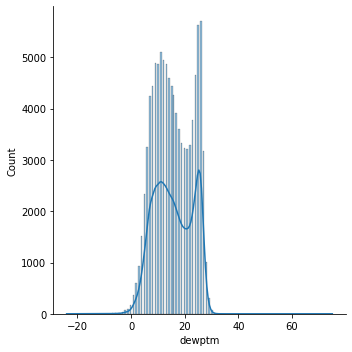

In [ ]:
sns.displot(data=ds,x='dewptm',kde=True)
plt.show()

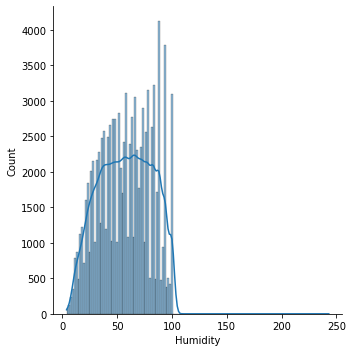

In [ ]:
sns.displot(data=ds,x='Humidity',kde=True)
plt.show()

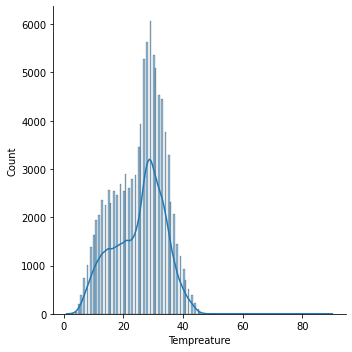

In [ ]:
sns.displot(data=ds,x='Tempreature',kde=True)
plt.show()

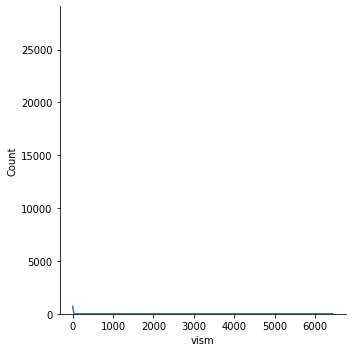

In [ ]:
sns.displot(data=ds,x='vism',kde=True)
plt.show()

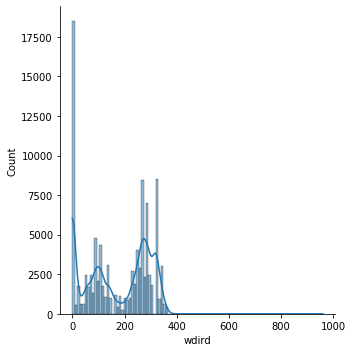

In [ ]:
sns.displot(data=ds,x='wdird',kde=True)
plt.show()

In [ ]:
sns.displot(data=ds,x='wspdm',kde=True)
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
ds['Conditions'].value_counts().plot(kind='bar')
plt.show()

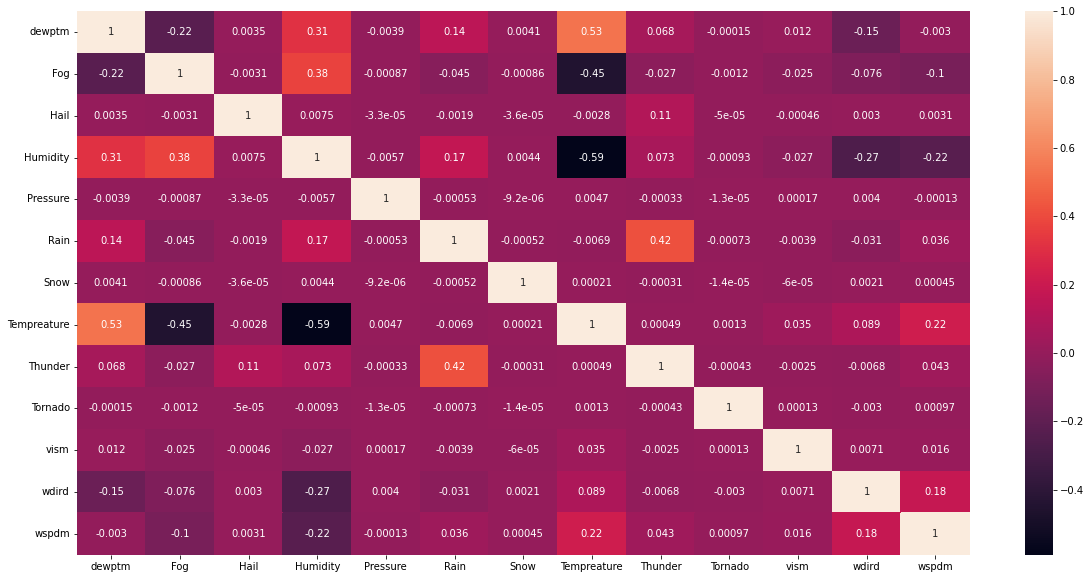

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(ds.corr(),annot=True)
plt.show()

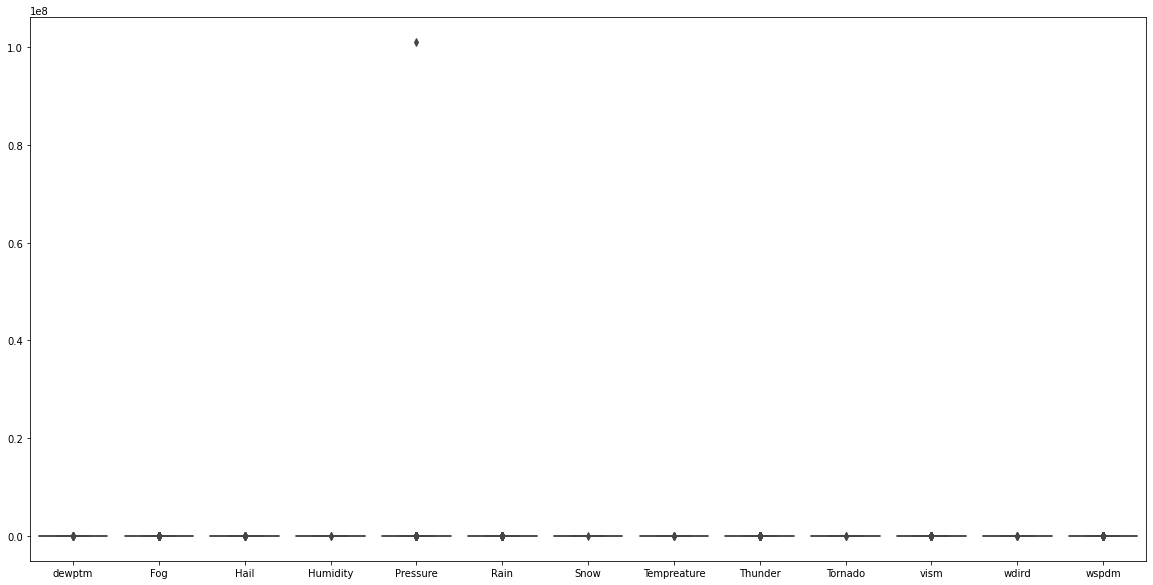

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=ds)
plt.show()

**REPORT**

In [ ]:
pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(ds)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]